# Problème: projection sur les vecteurs croissants

$\newcommand{\Rsp}{\mathbb{R}}
\newcommand{\nr}[1]{\Vert#1\Vert}$
Dans toute la suite, on supposera que $n=30$. On prendra pour vecteur $y$ celui donné ci-dessous. La solution du problème de minimisation (P) a été calculée et est stockée dans le vecteur xsol (ce qui permettra d'étudier la vitesse de convergence des deux algorithmes considérés):

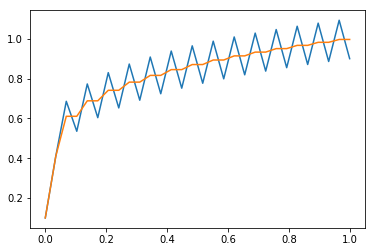

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 30
t = np.linspace(0,1,n)
y = np.sin(np.pi*t) + 0.05*((-1)*np.ones(n))**np.arange(0,n)
xsol = [0.05, 0.05811901842394177, 0.2649704402110241, 0.26930153013598, 0.4677214793686432, 0.4677214793686432,
        0.6464368370235942, 0.6464368370235942, 0.7078730506579234, 0.7078730506579234, 0.7078730506579218,
        0.7078730506579214, 0.7078730506579185, 0.7078730506579184, 0.7078730506579138, 0.7078730506579139,
        0.7078730506579083, 0.7078730506579083, 0.7078730506579022, 0.7078730506579018, 0.7078730506578964,
        0.7078730506578963, 0.7078730506578907, 0.707873050657891, 0.7078730506578864, 0.7078730506578865,
        0.7078730506578831, 0.7078730506578829, 0.7078730506578809, 0.707873050657881]

y = t**(.2) + 0.1*((-1)*np.ones(n))**np.arange(0,n)
xsol = [0.1, 0.40994155085547, 0.61050949395425, 0.61050949395425, 0.68822669685621, 0.68822669685621,
        0.74113432358973, 0.74113432358973, 0.78213869761712, 0.78213869761712, 0.81597977492704,
        0.81597977492704, 0.84498066677819, 0.84498066677819, 0.870467710917, 0.870467710917, 0.89327518939972,
        0.89327518939972, 0.91396456626673, 0.91396456626673, 0.9329330928813, 0.9329330928813, 0.95047290899607, 
        0.95047290899607, 0.96680557055346, 0.96680557055346, 0.98210337731863, 0.98210337731863, 0.99650315326896,
        0.99650315326896];

plt.plot(t,y)
plt.plot(t,xsol)


## Première approche: paramétrisation et gradient projeté

**QN1.** Calculer la matrice $A$ décrite dans le sujet. Écrire une fonction calculant la projection d'un vecteur $z\in \Rsp^n$ sur le convexe $L = \Rsp\times \Rsp_+^{n-1}$.

In [2]:
A = np.zeros((n,n));
for i in range(n):
    for j in range(i+1):
        A[i,j] = 1
def projL(z):
    p = z.copy()
    p[1:] = np.maximum(p[1:],0)
    return p

**QN2** Implémenter l'algorithme de gradient projeté décrit dans la première partie du sujet:
- Le pas de temps $\tau$ sera choisi égal à $1/\Lambda_A$ (on rappelle *np.linalg.eigh(B)[0]* permet de calculer les valeurs propres d'une matrice symétrique B).
- On effectuera $N = 30000$ itérations, et on tracera la courbe d'erreur $k \mapsto \nr{x^{(k)} - xsol}$ en échelle logarithmique.

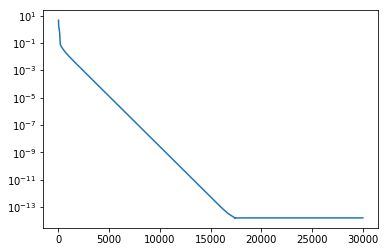

In [3]:
LambdaA = np.max(np.linalg.eigh(np.dot(A,A.T))[0])

tau = 1/LambdaA

niter = 30000
z = np.zeros(n)
e = np.zeros(niter)
for i in range(niter):
    d = - 2*(np.dot(A.T, np.dot(A,z)) - np.dot(A.T,y))
    z = projL(z + tau * d)
    x = np.dot(A,z)
    e[i] = np.linalg.norm(x - xsol)
    
plt.figure()
plt.semilogy(e)

**QN3** Montrer que si $\tau>\Lambda_A$, alors l'algorithme devient instable.

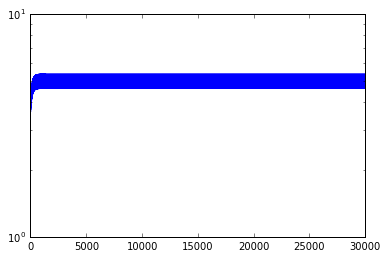

In [11]:
LambdaA = np.max(np.linalg.eigh(np.dot(A,A.T))[0])

tau = 1.15/LambdaA

niter = 30000
z = np.zeros(n)
e = np.zeros(niter)
for i in range(niter):
    d = - 2*(np.dot(A.T, np.dot(A,z)) - np.dot(A.T,y))
    z = projL(z + tau * d)
    x = np.dot(A,z)
    e[i] = np.linalg.norm(x - xsol)
    
plt.figure()
plt.semilogy(e)

## Deuxième approche: dualité algorithme d'Uzawa

**QN4.** Calculer la matrice $A$ décrite dans le sujet. Écrire une fonction projP calculant la projection d'un vecteur $\lambda \in \Rsp^n$ sur $\Rsp_+^{n-1}$.

In [17]:
D = np.diag(np.ones(n),0) - np.diag(np.ones(n-1),1);
D = D[0:-1,:]

def projP(z):
    return np.maximum(z,0)

**QN5** Implémenter l'algorithme d'Uzawa décrit dans la deuxième partie du sujet:
- Le pas de temps $\tau$ sera choisi égal à $1$ 
- On effectuera $N = 3000$ itérations, et on tracera la courbe d'erreur $k \mapsto \nr{x^{(k)} - xsol}$ en échelle logarithmique.

Dans une deuxième figure, illustrer l'instabilité de l'algorithme d'Uzawa pour $\tau > 1$.

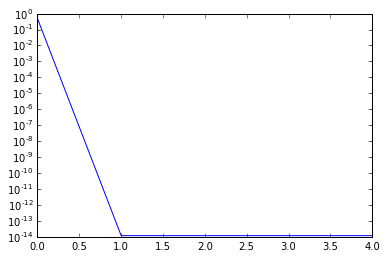

In [19]:
tau = 1
niter = 5
e = np.zeros(niter)
ld = np.zeros(n-1)
for i in range(niter):
    x = y - .5*np.dot(D.T,ld)
    d = np.dot(D,x)
    ld = projP(ld + tau*d)
    e[i] = np.linalg.norm(x - xsol)

plt.figure()
plt.semilogy(e)